In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Get information of Sale file (df1)
df1 = pd.read_csv('shipped_order.csv')
df1

,Order No,Order Date,Line No,Ship To Address No,Item Code,Order Qty,Quantity Shipped
0,528758,1/3/2019,1,1358538.0,111931,70.0,70.0
1,528791,1/3/2019,1,1254798.0,1029071,10.0,10.0
2,528791,1/3/2019,2,1254798.0,1033341,10.0,10.0
3,528791,1/3/2019,3,1254798.0,1040827,5.0,5.0
4,528791,1/3/2019,4,1254798.0,10106111,10.0,10.0
...,...,...,...,...,...,...,...
28310,543761,2/28/2019,1,43825307.0,113106,380.0,380.0
28311,543762,2/28/2019,1,1255123.0,113106,300.0,300.0
28312,543764,2/28/2019,2,43825307.0,10131275,400.0,400.0
28313,543765,2/28/2019,1,43825307.0,10131275,300.0,300.0


In [3]:
#Chance datetime for order date
df1['Order Date'] = pd.to_datetime(df1['Order Date'])
df1.dtypes

Order No                       int64
Order Date            datetime64[ns]
Line No                        int64
Ship To Address No           float64
Item Code                      int64
Order Qty                    float64
Quantity Shipped             float64
dtype: object

In [4]:
#Get information of Cancel file (df2)
df2 = pd.read_csv('canceled_order.csv')
df2

,Order Number,Line Number,Order Date,Ship To Address No,Item Code,Quantity Ordered,Quantity Canceled
0,528703,1,1/3/2019,1857566.0,10135139,1,1
1,528705,1,1/3/2019,1857566.0,10135140,1,1
2,528706,2,1/3/2019,1857566.0,10135138,1,1
3,528707,1,1/3/2019,1857566.0,10135132,1,1
4,528708,1,1/3/2019,1857566.0,10135359,1,1
...,...,...,...,...,...,...,...
3657,543485,8,2/25/2019,2203715.0,10135140,3,3
3658,543488,6,2/25/2019,2203449.0,1040468,2,2
3659,543488,7,2/25/2019,2203449.0,1040466,1,1
3660,543491,5,2/25/2019,2203449.0,10135358,21,21


In [33]:
df2['Order Date'] = pd.to_datetime(df2['Order Date'])

# Analysis Purpose: Get initial understanding of customer
Question:
1. Daily/Period volume.
2. Their success rate
3. Classify into categories of SKU criteria: %delivered/order and find which way to classify

Let's get to know more about data

In [6]:
#1st: classify order No in Sale and Order Number in Cancel if have overlapped
Order_No = df1['Order No'].tolist()
Order_Num = df2['Order Number'].tolist()
Num = [] #List Order No exist in Sale file
for num in Order_Num:
    if num in Order_No and num not in Num:
        Num.append(num)
print(len(Num))

1308


In [7]:
Not_duf = [] #List Order No not existing in Sale file
for num in Order_Num:
    if num not in Order_No and num not in Not_duf:
        Not_duf.append(num)
print(len(Not_duf))

617


In [8]:
1308+617

1925

About Order No: have 1925 Ordered was cancelled; 1308 was in Sale-file (list Num) -> means a part of product was delivered some not; and 617 Order No not in Sale-file (list Not-duf) -> 100% cancelled

In [9]:
#Sale
Sale_Item = df1.groupby('Item Code').sum()['Order Qty']
Sale_Item

Item Code
110441       9600.0
111931      15575.0
113106        908.0
1029069       188.0
1029070       443.0
             ...   
10137995      285.0
10137996     1588.0
10138004      612.0
10138005      274.0
10138006      364.0
Name: Order Qty, Length: 64, dtype: float64

In [10]:
for code, sale in Sale_Item.items():
    if sale == Sale_Item.max():
        print('Item Code with highest Ordered: ', code, 'Order Qty: ', sale)
    elif sale == Sale_Item.min():
        print('Item Code with lowest Ordered: ', code, 'Order Qty: ', sale)


Item Code with highest Ordered:  10098739 Order Qty:  27173.0
Item Code with lowest Ordered:  10115790 Order Qty:  1.0


In [11]:
#Cancel
Cancel_Item = df2.groupby('Item Code').sum()['Quantity Canceled']
Cancel_Item

Item Code
110441       430
111931      6315
1029069      175
1029070      172
1029071      288
            ... 
10137995      23
10137996      89
10138004      51
10138005      20
10138006      50
Name: Quantity Canceled, Length: 73, dtype: int64

In [12]:
for code, cancel in Cancel_Item.items():
    if cancel == Cancel_Item.max():
        print('Item Code with highest Cancellation: ', code, 'Order Qty: ', cancel)
    elif cancel == Cancel_Item.min():
        print('Item Code with lowest Cancellation: ', code, 'Order Qty: ', cancel)

Item Code with highest Cancellation:  111931 Order Qty:  6315
Item Code with lowest Cancellation:  1035986 Order Qty:  1


In [13]:
df1['Date'] = df1['Order Date'].dt.strftime('%m-%d')
df1

,Order No,Order Date,Line No,Ship To Address No,Item Code,Order Qty,Quantity Shipped,Date
0,528758,2019-01-03,1,1358538.0,111931,70.0,70.0,01-03
1,528791,2019-01-03,1,1254798.0,1029071,10.0,10.0,01-03
2,528791,2019-01-03,2,1254798.0,1033341,10.0,10.0,01-03
3,528791,2019-01-03,3,1254798.0,1040827,5.0,5.0,01-03
4,528791,2019-01-03,4,1254798.0,10106111,10.0,10.0,01-03
...,...,...,...,...,...,...,...,...
28310,543761,2019-02-28,1,43825307.0,113106,380.0,380.0,02-28
28311,543762,2019-02-28,1,1255123.0,113106,300.0,300.0,02-28
28312,543764,2019-02-28,2,43825307.0,10131275,400.0,400.0,02-28
28313,543765,2019-02-28,1,43825307.0,10131275,300.0,300.0,02-28


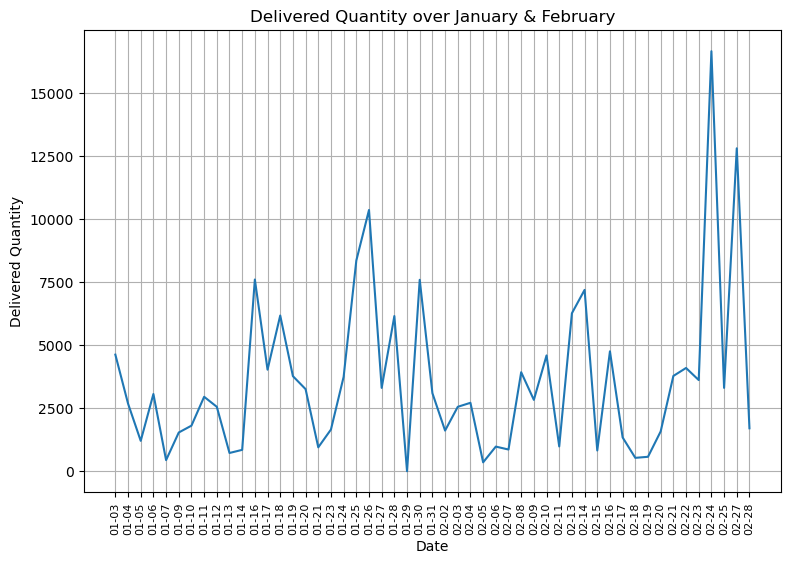

In [14]:
#Anwer 1st question: Daily/Period volume. Sale rate
Sale_date = df1.groupby('Date').sum()['Order Qty']
Date = []
for a, b in Sale_date.items():
    Date.append(a)
    
fig, ax1 = plt.subplots(figsize =(9,6))

ax1.plot(Sale_date)
plt.xticks(Date, rotation = 90, size =8)
plt.grid()

plt.xlabel('Date')
plt.ylabel('Delivered Quantity')
plt.title('Delivered Quantity over January & February')

plt.show()

In [15]:
print("Sale by day on minimum, maximum and average: ")
print(Sale_date.min())
print(Sale_date.max())
print(Sale_date.mean())

Sale by day on minimum, maximum and average: 
9.0
16656.0
3592.843137254902


We can see from this chart:
1. each month, we have 3 stage: beginning with low order, order-Qty increases to medium at middle, and highest at around end of the month
2. 3 time with highest ordered: 25-26 Jan; 24-Feb; 27-Feb
But ordered from 24 and 27 Feb are too high, let's use scatter plot to clarify if these data are too different versus others

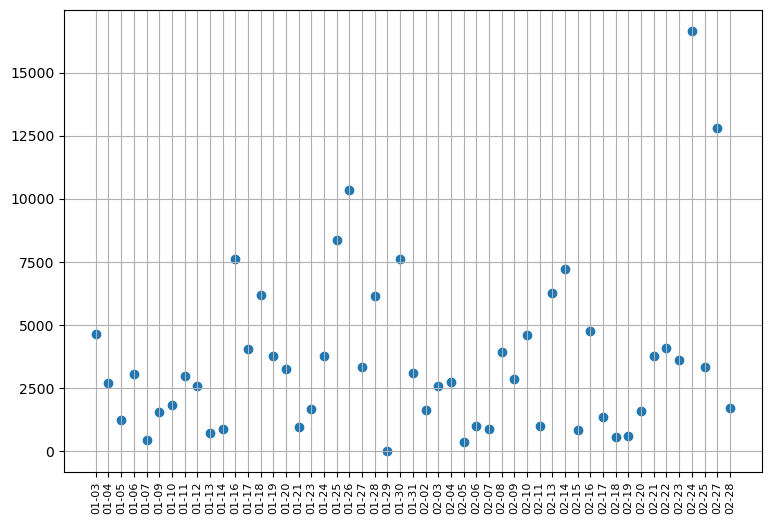

In [16]:
fig, ax1 = plt.subplots(figsize =(9,6))

ax1.scatter(Date, Sale_date)
plt.xticks(Date, rotation = 90, size =8)
plt.grid()
plt.show()

In [17]:
#It's true that 24 adn 27 Feb Ordered-Qty is abnormal and might create misleading
#let's check data of 24,27-Feb
df1.loc[df1.Date=='02-24']

,Order No,Order Date,Line No,Ship To Address No,Item Code,Order Qty,Quantity Shipped,Date
26401,542902,2019-02-24,1,2250089.0,10135771,1.0,1.0,02-24
26402,542903,2019-02-24,1,2251768.0,10135771,2.0,2.0,02-24
26403,542904,2019-02-24,1,2252858.0,10135771,1.0,1.0,02-24
26404,542905,2019-02-24,1,2264626.0,10135771,3.0,3.0,02-24
26405,542906,2019-02-24,1,2269726.0,10135771,2.0,2.0,02-24
...,...,...,...,...,...,...,...,...
27258,543297,2019-02-24,2,1740542.0,10108314,60.0,60.0,02-24
27259,543297,2019-02-24,3,1740542.0,10108292,80.0,80.0,02-24
27260,543297,2019-02-24,4,1740542.0,10108290,15.0,15.0,02-24
27261,543297,2019-02-24,5,1740542.0,10108313,40.0,40.0,02-24


In [18]:
df1.loc[df1.Date=='02-27']

,Order No,Order Date,Line No,Ship To Address No,Item Code,Order Qty,Quantity Shipped,Date
27520,543556,2019-02-27,1,43823585.0,10098739,40.0,40.0,02-27
27521,543556,2019-02-27,2,43823585.0,10133703,30.0,30.0,02-27
27522,543557,2019-02-27,1,1418561.0,10133703,55.0,55.0,02-27
27523,543557,2019-02-27,2,1418561.0,10135359,10.0,10.0,02-27
27524,543569,2019-02-27,1,1255532.0,10098739,1.0,1.0,02-27
...,...,...,...,...,...,...,...,...
28301,543749,2019-02-27,2,2252839.0,1038323,1.0,1.0,02-27
28302,543750,2019-02-27,1,1995627.0,1038323,1.0,1.0,02-27
28303,543750,2019-02-27,2,1995627.0,10098739,1.0,1.0,02-27
28304,543751,2019-02-27,1,1850371.0,10137990,1.0,1.0,02-27


In [19]:
df1.loc[df1.Date=='01-26']

,Order No,Order Date,Line No,Ship To Address No,Item Code,Order Qty,Quantity Shipped,Date
10495,534350,2019-01-26,1,1255576.0,1040765,7.0,7.0,01-26
10496,534351,2019-01-26,1,1255589.0,10137990,1.0,1.0,01-26
10497,534352,2019-01-26,1,1255591.0,1033341,1.0,1.0,01-26
10498,534352,2019-01-26,2,1255591.0,1040726,1.0,1.0,01-26
10499,534352,2019-01-26,3,1255591.0,10137990,1.0,1.0,01-26
...,...,...,...,...,...,...,...,...
11875,534931,2019-01-26,5,1255193.0,1038323,3.0,3.0,01-26
11876,534931,2019-01-26,6,1255193.0,10133703,5.0,5.0,01-26
11877,534931,2019-01-26,7,1255193.0,10135358,10.0,10.0,01-26
11878,534931,2019-01-26,8,1255193.0,10135139,7.0,7.0,01-26


#after checking, it seems like no abnormal for this case. Further question to customer: Which activity organized at the end of month that increased ordered?
From above plot, we can see that:
1. the average ordered Qty is 2500-5000 products daily
2. stock should be prepared for end of month as demand has increasing trend
We will see breakdown in categorizing later.

In [20]:
#Step 2: check cancellation rate
df2['Date'] = df2['Order Date'].dt.strftime('%m-%d')
df2

,Order Number,Line Number,Order Date,Ship To Address No,Item Code,Quantity Ordered,Quantity Canceled,Date
0,528703,1,2019-01-03,1857566.0,10135139,1,1,01-03
1,528705,1,2019-01-03,1857566.0,10135140,1,1,01-03
2,528706,2,2019-01-03,1857566.0,10135138,1,1,01-03
3,528707,1,2019-01-03,1857566.0,10135132,1,1,01-03
4,528708,1,2019-01-03,1857566.0,10135359,1,1,01-03
...,...,...,...,...,...,...,...,...
3657,543485,8,2019-02-25,2203715.0,10135140,3,3,02-25
3658,543488,6,2019-02-25,2203449.0,1040468,2,2,02-25
3659,543488,7,2019-02-25,2203449.0,1040466,1,1,02-25
3660,543491,5,2019-02-25,2203449.0,10135358,21,21,02-25


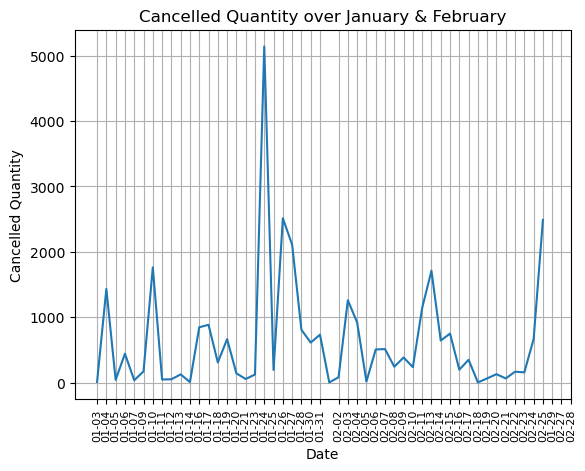

In [21]:
Cancel_date = df2.groupby('Date').sum()['Quantity Ordered']
    
plt.plot(Cancel_date)
plt.xticks(Date, rotation = 90, size =8)
plt.grid()

plt.xlabel('Date')
plt.ylabel('Cancelled Quantity')
plt.title('Cancelled Quantity over January & February')

plt.show()

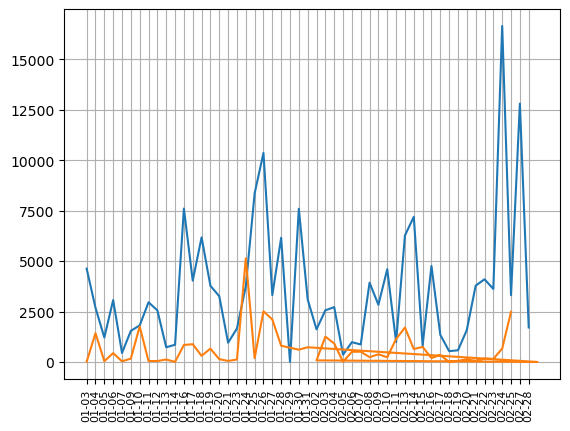

In [22]:
#We need to compare with delivered quantity to identify trend/having further insight
plt.plot(Sale_date)
plt.plot(Cancel_date)
plt.xticks(Date, rotation = 90, size =8)
plt.grid()

plt.show()

In [23]:
#Let's calculate success rate/cancel rate by day
df1['Quantity Canceled']=np.nan
result = pd.concat([df1,df2.rename(columns={'Order Number':'Order No', 'Line Number':'Line No', 'Quantity Ordered':'Order Qty'})], ignore_index=True)
result = result.fillna(0)
result

,Order No,Order Date,Line No,Ship To Address No,Item Code,Order Qty,Quantity Shipped,Date,Quantity Canceled
0,528758,2019-01-03,1,1358538.0,111931,70.0,70.0,01-03,0.0
1,528791,2019-01-03,1,1254798.0,1029071,10.0,10.0,01-03,0.0
2,528791,2019-01-03,2,1254798.0,1033341,10.0,10.0,01-03,0.0
3,528791,2019-01-03,3,1254798.0,1040827,5.0,5.0,01-03,0.0
4,528791,2019-01-03,4,1254798.0,10106111,10.0,10.0,01-03,0.0
...,...,...,...,...,...,...,...,...,...
31972,543485,2019-02-25,8,2203715.0,10135140,3.0,0.0,02-25,3.0
31973,543488,2019-02-25,6,2203449.0,1040468,2.0,0.0,02-25,2.0
31974,543488,2019-02-25,7,2203449.0,1040466,1.0,0.0,02-25,1.0
31975,543491,2019-02-25,5,2203449.0,10135358,21.0,0.0,02-25,21.0


In [24]:
Total_Order = result.groupby('Date').sum()['Order Qty']
Total_Ship = result.groupby('Date').sum()['Quantity Shipped']
Deliver_Per = Total_Ship/Total_Order*100
print('Average Percentage of Success Shipped Rate per day: ')
Deliver_Per.mean()

Average Percentage of Success Shipped Rate per day: 


83.72271768667078

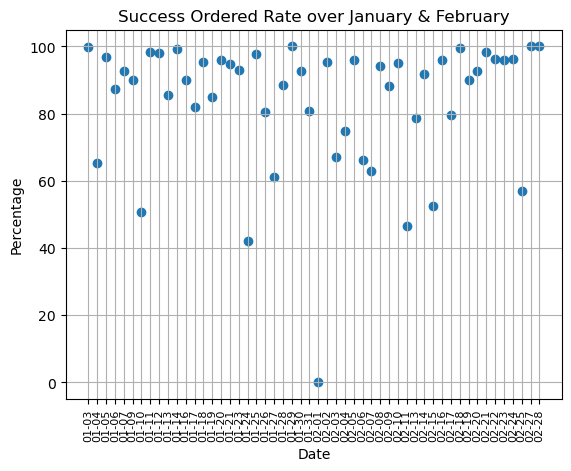

In [25]:
date = []
for a, b in Deliver_Per.items():
    date.append(a)

plt.scatter(date, Deliver_Per)
plt.xticks(date, rotation = 90, size =8)
plt.grid()

plt.xlabel('Date')
plt.ylabel('Percentage')
plt.title('Success Ordered Rate over January & February')

plt.show()

In [26]:
#Let's analyze by Item Code
Total_Order_ID = result.groupby('Item Code').sum()['Order Qty']
Total_Ship_ID = result.groupby('Item Code').sum()['Quantity Shipped']
Deliver_Per_ID = Total_Ship_ID/Total_Order_ID*100
print('Average Percentage, max and min of Success Shipped Rate by Item Code: ')
print(Deliver_Per_ID.mean())
print(Deliver_Per_ID.max())
print(Deliver_Per_ID.min())

Average Percentage, max and min of Success Shipped Rate by Item Code: 
67.4761791483127
100.0
0.0


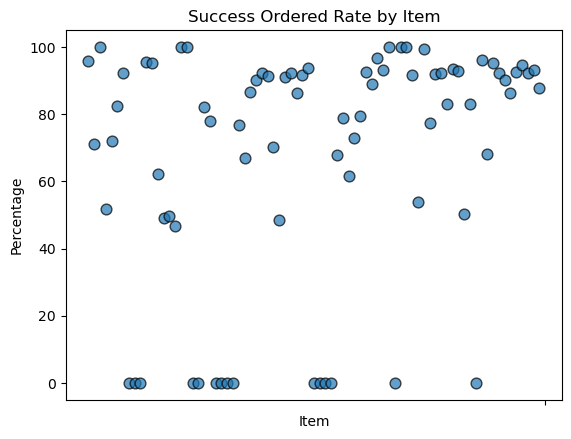

In [27]:
Item = []
for a, b in Deliver_Per_ID.items():
    Item.append(str(a))

fig, ax = plt.subplots()
ax.scatter(Item, Deliver_Per_ID, s=60, alpha=0.7, edgecolors="k")
plt.xticks('')
plt.xlabel('Item')
plt.ylabel('Percentage')
plt.title('Success Ordered Rate by Item')
plt.show()

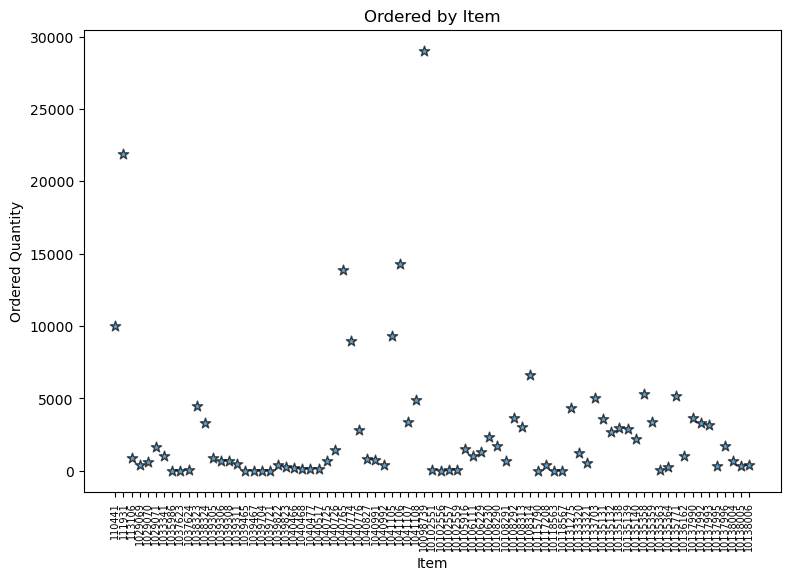

In [28]:
Item = []
for a, b in Total_Order_ID.items():
    Item.append(str(a))

fig, ax = plt.subplots(figsize=(9,6))
ax.scatter(Item, Total_Order_ID, s=60, alpha=0.7, edgecolors="k", marker = "*")
plt.xticks(Item, rotation = 90, size=7)
plt.xlabel('Item')
plt.ylabel('Ordered Quantity')
plt.title('Ordered by Item')
plt.show()

In [29]:
Total_Order_ID.mean()

2723.3924050632913

In [30]:
#Let's Analyze by Line
Total_Order_Line = result.groupby('Line No').sum()['Order Qty']
Total_Ship_Line = result.groupby('Line No').sum()['Quantity Shipped']
Deliver_Per_Line = Total_Ship_Line/Total_Order_Line*100
print('Average Percentage, max and min of Success Shipped Rate by Line: ')
print(Deliver_Per_Line.mean())
print(Deliver_Per_Line.max())
print(Deliver_Per_Line.min())

Average Percentage, max and min of Success Shipped Rate by Line: 
88.3016705401696
100.0
42.34234234234234


C:\Users\vy\AppData\Local\Temp\ipykernel_13512\28151457.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(Line, rotation = 90, size=8)


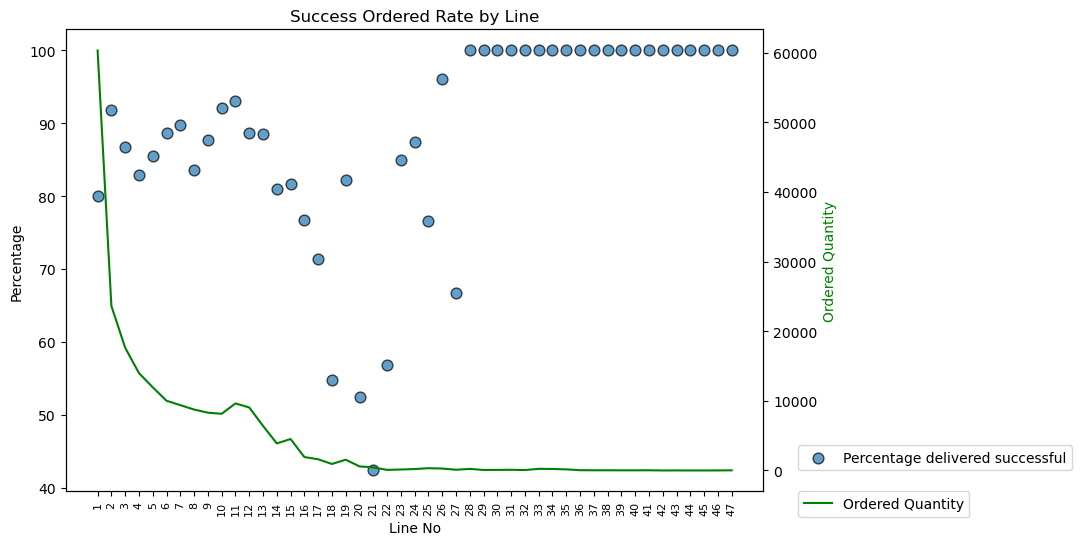

In [31]:
Line = []
for a, b in Deliver_Per_Line.items():
    Line.append(str(a))

fig, ax1 = plt.subplots(figsize =(9,6))
ax2 = ax1.twinx()

ax1.scatter(Line, Deliver_Per_Line, s=60, alpha=0.7, edgecolors="k")
ax2.plot(Line, Total_Order_Line, color = 'g')


ax1.legend(['Percentage delivered successful'], bbox_to_anchor=(1.05, 0.1), loc='upper left', borderaxespad=0)
ax2.legend(['Ordered Quantity'], bbox_to_anchor=(1.05, 0), loc='upper left', borderaxespad=0)

ax1.set_xticklabels(Line, rotation = 90, size=8)
ax1.set_xlabel('Line No')
ax1.set_ylabel('Percentage')
ax2.set_ylabel('Ordered Quantity', color='g')

plt.title('Success Ordered Rate by Line')

plt.show()

In [32]:
Total_Order_Line

Line No
1     60295.0
2     23619.0
3     17624.0
4     13976.0
5     11942.0
6     10011.0
7      9380.0
8      8750.0
9      8299.0
10     8140.0
11     9625.0
12     9050.0
13     6402.0
14     3889.0
15     4515.0
16     1929.0
17     1613.0
18      936.0
19     1551.0
20      586.0
21      444.0
22       88.0
23      140.0
24      206.0
25      329.0
26      281.0
27      108.0
28      231.0
29       78.0
30       85.0
31      100.0
32       66.0
33      238.0
34      218.0
35      160.0
36       44.0
37       30.0
38       30.0
39       25.0
40       25.0
41       30.0
42        5.0
43       10.0
44        3.0
45        5.0
46       12.0
47       25.0
Name: Order Qty, dtype: float64

# Conclusion on sale and success rate:
1. Average over 3500 ordered per day, with average successful delivered by > 80%
   Trend: ordered increased from early of month and reach maximum by end of month
2. By Item: in 73 sale-items; average successful delivered by > 60%, average order for 1 item is > 2500
   We have 6 items at best_sell: over 10000 order
3. By Line (ordered in 2 months). Total 47 Line:
   - 1 Best line > 60000 ordered - Line 1
   - 5 Line 10000-20000 ordered - Line 2-6
   - 15 Line 1000-10000 ordered
   - The rest < 1000 ordred
   - average successful delivered by > 88%

Let's categorize to get further understanding

In [39]:
#Categorize by Item and success rate of <80%; 80-95%; >95%
Item_Category = pd.cut(Deliver_Per_ID, bins = [0,80,95,100], labels = ['<80%','80%-95%','>95%'])
Item_Category.value_counts()

80%-95%    30
<80%       21
>95%       13
dtype: int64

In [42]:
Under_80 = []
Between80_95 = []
Over_95 = []
for a,b in Item_Category.items():
    if b == '<80%':
        Under_80.append(a)
    elif b == '80%-95%':
        Between80_95.append(a)
    else:
        Over_95.append(a)

print("List Item Code success rate < 80%: ")
print(Under_80)
print("List Item Code success rate from 80-95%: ")
print(Between80_95)
print("List Item Code success rate over 95%: ")
print(Over_95)

List Item Code success rate < 80%: 
[111931, 1029069, 1029070, 1039305, 1039306, 1039308, 1039311, 1039823, 1040725, 1040726, 1040991, 1040992, 10105916, 10106111, 10106229, 10106230, 10108290, 10133320, 10133703, 10135358, 10135771]
List Item Code success rate from 80-95%: 
[1029071, 1033341, 1039822, 1040765, 1040774, 1040776, 1040827, 1041105, 1041106, 1041107, 1041108, 10098739, 10108291, 10108292, 10108314, 10131275, 10135131, 10135132, 10135138, 10135139, 10135140, 10135359, 10137990, 10137992, 10137993, 10137995, 10137996, 10138004, 10138005, 10138006]
List Item Code success rate over 95%: 
[110441, 113106, 1035986, 1037623, 1037624, 1038323, 1038324, 1039465, 1039467, 1039704, 1039721, 1040466, 1040468, 1040477, 1040517, 10102551, 10102556, 10102557, 10102559, 10108313, 10115790, 10117208, 10118563, 10118567, 10133321, 10135363, 10135364, 10136162]


In [46]:
#Categorize by Item and Order Quantity
Order_Qtu_Cat = pd.cut(Total_Order_ID, bins = [0,1000,3000,5000,10000,30000], labels = ['Very Low','Low','Medium','High','Very High'])
Order_Qtu_Cat.value_counts()

Very Low     41
Low          15
Medium       12
High          6
Very High     5
Name: Order Qty, dtype: int64

In [49]:
#This step helps us to identify Items with high volumn, medium or low volumn, depends on purpose of further analysis, we can dig deeper with these lists
Under_1M = []
Between1_3M = []
Between3_5M = []
Between5_10M = []
Over_10M = []
for a,b in Order_Qtu_Cat.items():
    if b == 'Very Low':
        Under_1M.append(a)
    elif b == 'Low':
        Between1_3M.append(a)
    elif b == 'Medium':
        Between3_5M.append(a)
    elif b == 'High':
        Between5_10M.append(a)
    else:
        Over_10M.append(a)
        
print('List Item has over 10M order')
print(Over_10M)
print('List Item has 5-10M order')
print(Between5_10M)

List Item has over 10M order
[110441, 111931, 1040765, 1041106, 10098739]
List Item has 5-10M order
[1040774, 1041105, 10108314, 10133703, 10135358, 10135771]


In [56]:
#Categorize by Address (Customer) and success rate of <80%; 80-95%; >95%
Customer_Order = result.groupby('Ship To Address No').sum()['Order Qty']
Customer_Ship = result.groupby('Ship To Address No').sum()['Quantity Shipped']
Deliver_Per_Customer = Customer_Ship/Customer_Order*100
Customer_Category = pd.cut(Deliver_Per_Customer, bins = [0,80,95,100], labels = ['<80%','80%-95%','>95%'])
Customer_Category.value_counts()

80%-95%    377
>95%       252
<80%        79
dtype: int64

In [57]:
#Categorize by Customer and Order Quantity
print(Customer_Order.min())
print(Customer_Order.max())
print(Customer_Order.mean())

1.0
20907.0
294.3201094391245


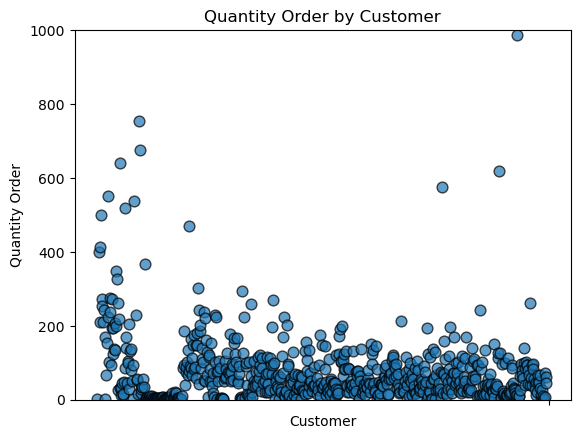

In [63]:
Customer_ID = []
for a, b in Customer_Order.items():
    Customer_ID.append(str(a))

fig, ax = plt.subplots()
ax.scatter(Customer_ID, Customer_Order, s=60, alpha=0.7, edgecolors="k")
plt.xticks('')
plt.xlabel('Customer')
plt.ylabel('Quantity Order')
plt.title('Quantity Order by Customer')
ax.set_ylim(0,1000)
plt.show()

In [59]:
Customer_Cat = pd.cut(Customer_Order, bins = [0,200,500,1000,5000,30000], labels = ['Very Low','Low','Medium','High','Very High'])
Customer_Cat.value_counts()

Very Low     652
Low           37
High          22
Very High     11
Medium         9
Name: Order Qty, dtype: int64

# Conclusion after categorizing & Direction for further investigation
From success rate, we can see:
1. Overall success rate >80%. Service level for customer about 89% have success rate >80%, means high percentage of customer receive their order
Opportunity: Discover how can we increase success rate of customer by different groups
2. By Item, we have 32% item with success rate < 80% - which is very low rate
Opportunity: Improve success rate in this group, we can analyze deeper into item code by comparing with list code categorized by Order Quantity
3. Overall, success rate by item not high, this can be big area for improvement

Further investigation:
1. Why success rate for item not high?
2. Then what we can do to improve it?
3. how can we improve success rate for customer by groups?